In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from IPython.display import display
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(rc={"figure.figsize": (12, 8)})


In [43]:
def plot_box(colname, mydf):
    data = pd.concat([mydf[colname], mydf['soldPrice']], axis = 1)
    sns.boxplot(x=colname, y = 'soldPrice', data=data)
    plt.figure()

def scale_print_outliars(colname):
    global df
    data = df[colname]
    data_scaled = StandardScaler().fit_transform(data[:,np.newaxis]);
    low_range = data_scaled[data_scaled[:,0].argsort()][:10]
    high_range= data_scaled[data_scaled[:,0].argsort()][-10:]
    print('outer range (low) of the distribution:')
    display(low_range)
    print('outer range (high) of the distribution:')
    display(high_range)

def remove_outliars(colname, thred, modify  = False):
    global df
    coldata = df[colname]
    outliar_mask = (abs(coldata - np.mean(coldata)) < thred * np.std(coldata))| pd.isnull(coldata)
    coldata_noutliar = coldata[outliar_mask]
    if modify:
        df = df[outliar_mask]
    return df.shape[0]

def print_max(colname):
    global df
    sorted_df = df.sort_values(colname, ascending = False, inplace=False)
    print(colname, 'top 10 values:')
    display(sorted_df[colname][:10,])
    

def run_outliar_filter_stable(colname,threshold):
    print_max(colname)
    original_row_num = df.shape[0]
    old_shape = 0
    new_shape = 0
    while old_shape == 0 or (old_shape != new_shape):
        old_shape = new_shape
        new_shape = remove_outliars(colname,threshold,True)
    coldata = df[colname] 
    cur_row_num = coldata.shape[0]
    drop_percent = (row_num- cur_row_num)/row_num *100
    drop_percent_specific = (original_row_num - cur_row_num)/original_row_num * 100
    print("This operation drops rows:",drop_percent_specific)
    print("The percentage of total entries removed:",drop_percent)
    print("Skewness: %f" % coldata.skew())
    print("Kurtosis: %f" % coldata.kurt())
    print(df.shape)
    sns.distplot(coldata[~pd.isnull(coldata)])
    plt.figure()
    print_max(colname)

    
def remove_entry_morethan(colname, maxval):
    global df
    df = df.drop(df[df[colname]>maxval].index)



In [44]:
CSV_PATH = "../../data/csv/"
DF_NAME = "ksou_45074x19.csv"
df = pd.read_csv(CSV_PATH + DF_NAME)
row_num = 45074
col_num = 19

distanceToCBD top 10 values:


18142    18628.0
37979     3644.0
41107     3644.0
37982     3644.0
38276     3617.0
36092     3612.0
35338     3592.0
4852      3347.0
4851      3347.0
28034     3347.0
Name: distanceToCBD, dtype: float64

This operation drops rows: 4.532546479123219
The percentage of total entries removed: 4.532546479123219
Skewness: 1.699885
Kurtosis: 3.812412
(43031, 19)
distanceToCBD top 10 values:


37657    102.0
37822    102.0
37820    102.0
37790    101.0
39109    101.0
41155    100.0
37781    100.0
37815    100.0
4685     100.0
41158    100.0
Name: distanceToCBD, dtype: float64

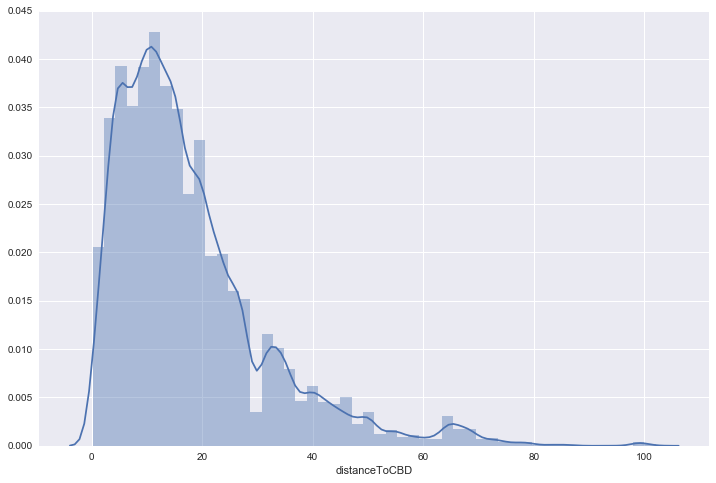

In [45]:
run_outliar_filter_stable('distanceToCBD', 6)

distanceToStation top 10 values:


39109    85.0
39111    81.0
39108    73.0
18525    73.0
39110    73.0
18524    72.0
42903    71.0
18526    71.0
18527    71.0
39107    71.0
Name: distanceToStation, dtype: float64

This operation drops rows: 0.908647254305036
The percentage of total entries removed: 5.400008874295603
Skewness: 2.384088
Kurtosis: 7.200018
(42640, 19)
distanceToStation top 10 values:


9180     21.0
9168     21.0
33566    21.0
10702    21.0
28421    21.0
26457    21.0
1091     21.0
9165     21.0
24628    21.0
24629    21.0
Name: distanceToStation, dtype: float64

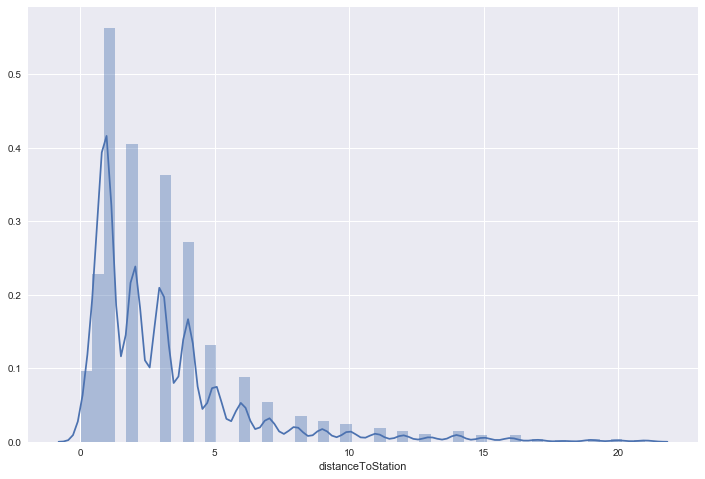

In [46]:
run_outliar_filter_stable('distanceToStation', 6)

soldPrice top 10 values:


36260    11000000
9470      7250000
43043     7000000
4093      6850000
29589     6500000
28685     6250000
4918      6000000
24638     6000000
9475      5500000
28634     5100000
Name: soldPrice, dtype: int64

This operation drops rows: 0.600375234521576
The percentage of total entries removed: 5.967963792873941
Skewness: 2.032646
Kurtosis: 6.007562
(42384, 19)
soldPrice top 10 values:


39398    2130000
43623    2125000
39869    2125000
7374     2110000
35993    2100000
10833    2100000
35931    2100000
12804    2100000
20097    2100000
18630    2100000
Name: soldPrice, dtype: int64

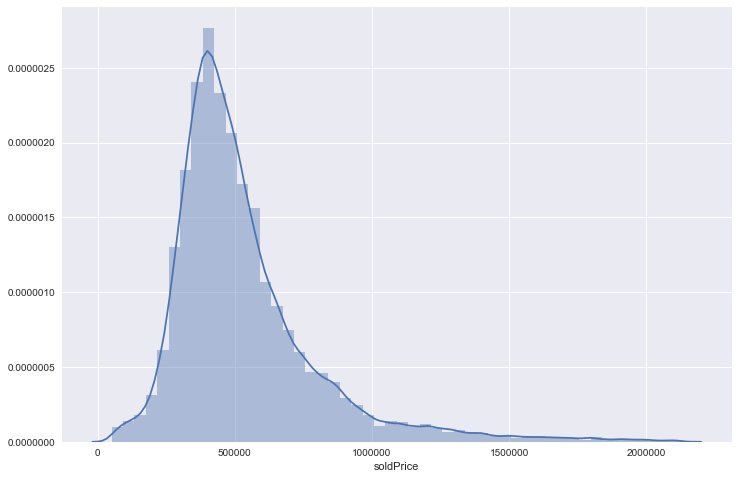

In [47]:
run_outliar_filter_stable('soldPrice', 6)

buildingSize top 10 values:


15919    14876.0
33076    11659.0
20516     9392.0
30091     8101.0
35064     7218.0
39126     7153.0
39125     7153.0
6289      6875.0
26195     6568.0
29181     6503.0
Name: buildingSize, dtype: float64

This operation drops rows: 0.7927519818799547
The percentage of total entries removed: 6.713404623508009
Skewness: 1.154842
Kurtosis: 2.510369
(42048, 19)
buildingSize top 10 values:


19593    573.0
42129    570.0
29871    566.0
42687    566.0
31223    566.0
12982    563.0
20905    557.0
7631     556.0
14757    554.0
5068     554.0
Name: buildingSize, dtype: float64

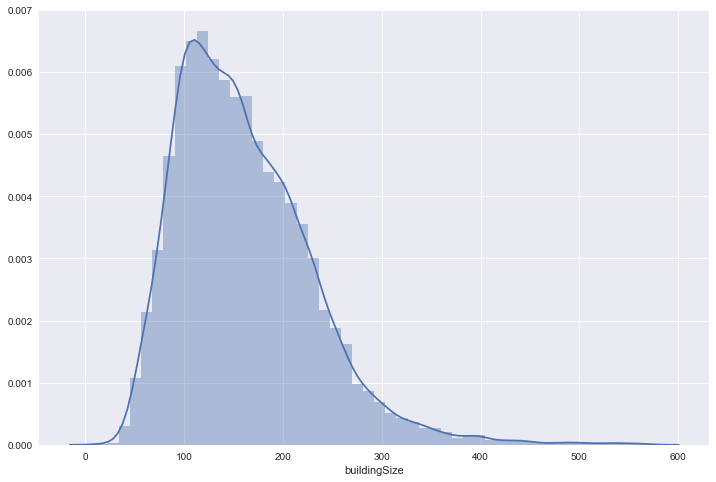

In [48]:
run_outliar_filter_stable('buildingSize', 6)

landSize top 10 values:


2445     594040.0
8557     235263.0
42748    226664.0
44162    226664.0
44160    226664.0
42749    226664.0
43355    226664.0
43852    226664.0
37145    178973.0
37184    170823.0
Name: landSize, dtype: float64

This operation drops rows: 1.71470700152207
The percentage of total entries removed: 8.312996405910281
Skewness: 4.262726
Kurtosis: 21.965783
(41327, 19)
landSize top 10 values:


33828    12466.0
3594     12380.0
3592     12380.0
35376    12319.0
35377    12319.0
27235    12301.0
631      12273.0
3083     12234.0
39099    12212.0
1980     12147.0
Name: landSize, dtype: float64

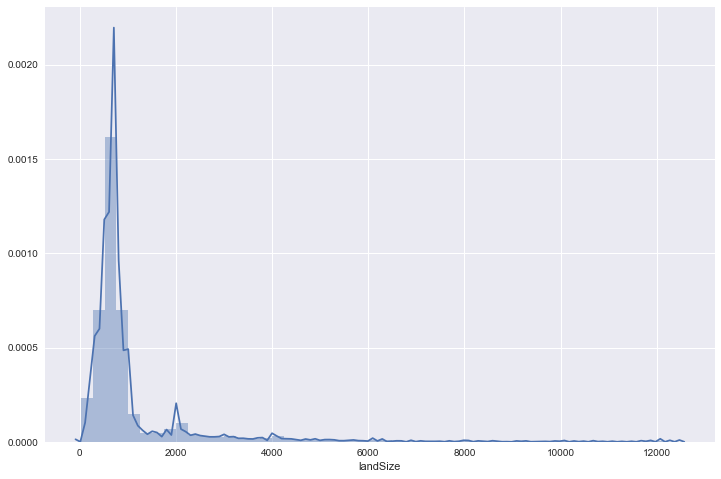

In [49]:
run_outliar_filter_stable('landSize', 8)

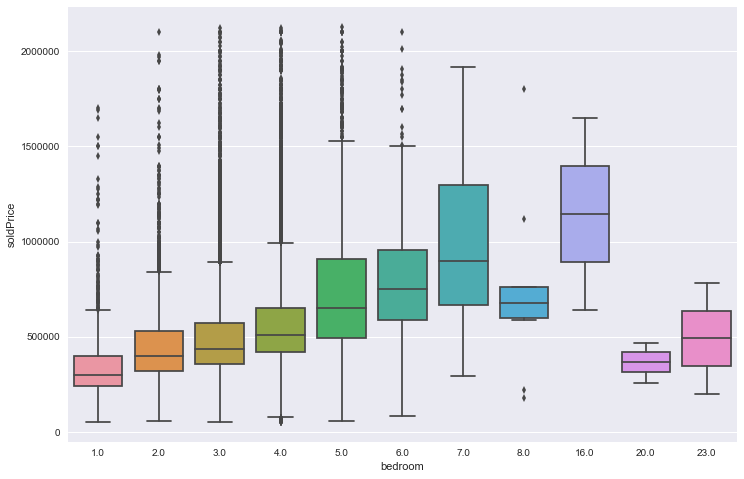

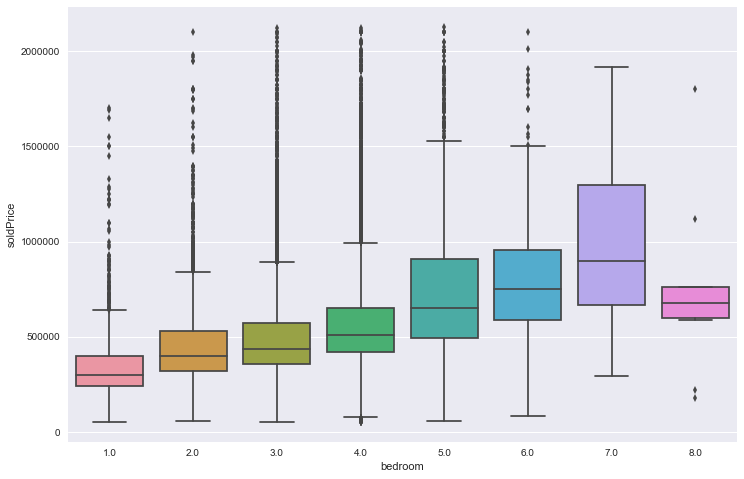

In [50]:
plot_box('bedroom',df)
remove_entry_morethan('bedroom', 8)
plot_box('bedroom',df)

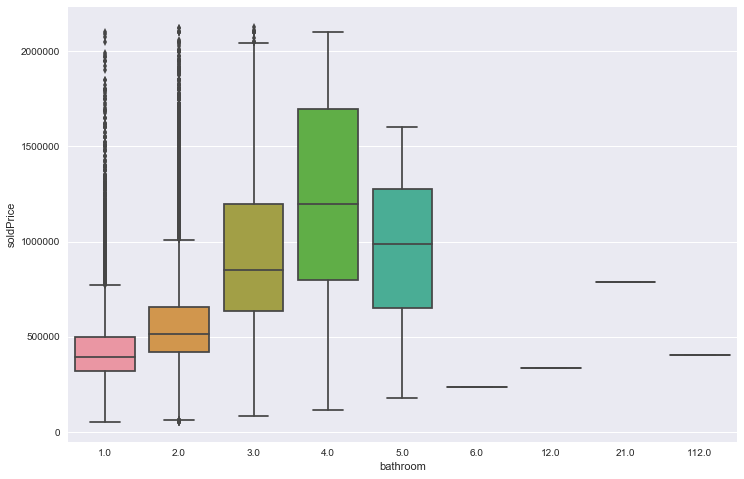

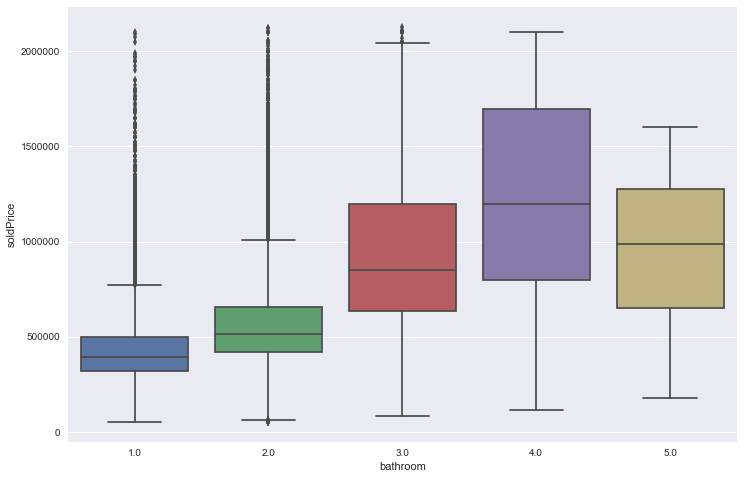

In [51]:
plot_box('bathroom',df)
remove_entry_morethan('bathroom', 5)
plot_box('bathroom',df)

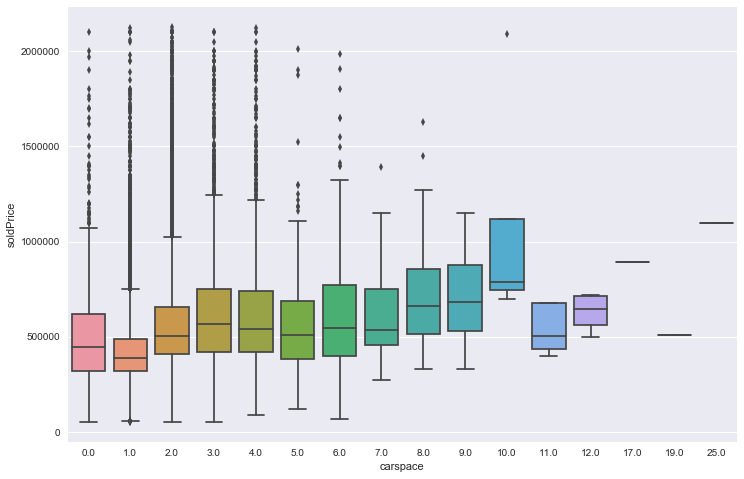

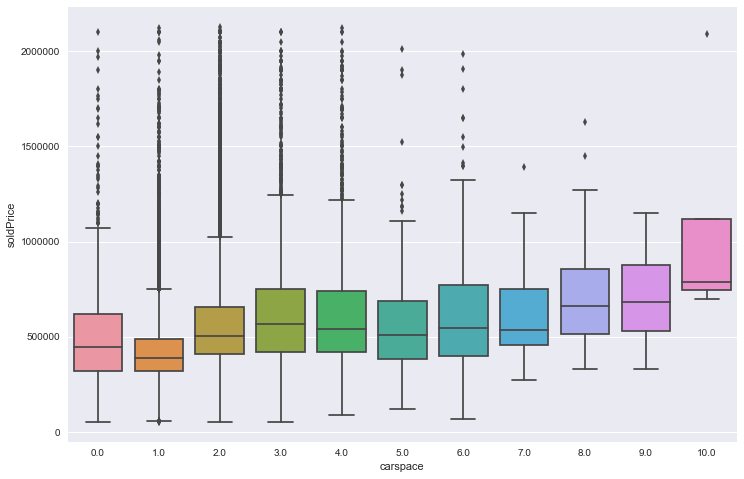

In [52]:
plot_box('carspace',df)
remove_entry_morethan('carspace', 10)
plot_box('carspace',df)

In [53]:
cur_row_num = df.shape[0]
drop_percent = (row_num- cur_row_num)/row_num *100
print("The percentage of total entries removed:",drop_percent)
df.to_csv(CSV_PATH+ 'ksou_cleaned.csv',index = False)

The percentage of total entries removed: 8.364023605626302
